In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [3]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)


In [4]:
rating_df=pd.read_csv("../data/rating.csv")
domain_locations_df = pd.read_csv("../data/domains_location.csv")
traffic_data_df = pd.read_csv("../data/traffic.csv")
       

# Drop duplicates
rating_df.drop_duplicates(inplace=True)
domain_locations_df.drop_duplicates(inplace=True)
traffic_data_df.drop_duplicates(inplace=True)

# Drop unnecessary columns
if 'source_id' in rating_df.columns:
    rating_df.drop(columns=['source_id'], inplace=True)

if 'url_to_image' in rating_df.columns:
    rating_df.drop(columns=['url_to_image'], inplace=True)

# Drop rows with missing values
rating_df = rating_df.dropna(axis=0)
domain_locations_df = domain_locations_df.dropna(axis=0)

# rating_df['domain'] = rating_df['url'].apply(get_domain)

merge_df=pd.merge(rating_df, domain_locations_df ,left_on='source_name', right_on ='SourceCommonName' ,how ='left')
merge_df=pd.merge(merge_df, traffic_data_df , left_on ='source_name' ,right_on='Domain' ,how ='left')

In [5]:
#  Top and Bottom 10 Websites
top_10_websites = merge_df['source_name'].value_counts().head(10)
bottom_10_websites = merge_df['source_name'].value_counts().tail(10)

print("Top 10 Websites are:\n", top_10_websites)
print("\nBottom 10 Websites are:\n", bottom_10_websites)

Top 10 Websites are:
 source_name
ETF Daily News        15035
The Times of India     6987
GlobeNewswire          5040
Globalsecurity.org     2904
Forbes                 2574
BBC News               2018
Business Insider       1976
ABC News               1946
The Punch              1748
Al Jazeera English     1587
Name: count, dtype: int64

Bottom 10 Websites are:
 source_name
Time                           579
Android Central                515
Gizmodo.com                    380
ReadWrite                      315
Wired                          256
CNN                            252
The Verge                      205
Marketscreener.com             180
AllAfrica - Top Africa News     18
Euronews                         2
Name: count, dtype: int64


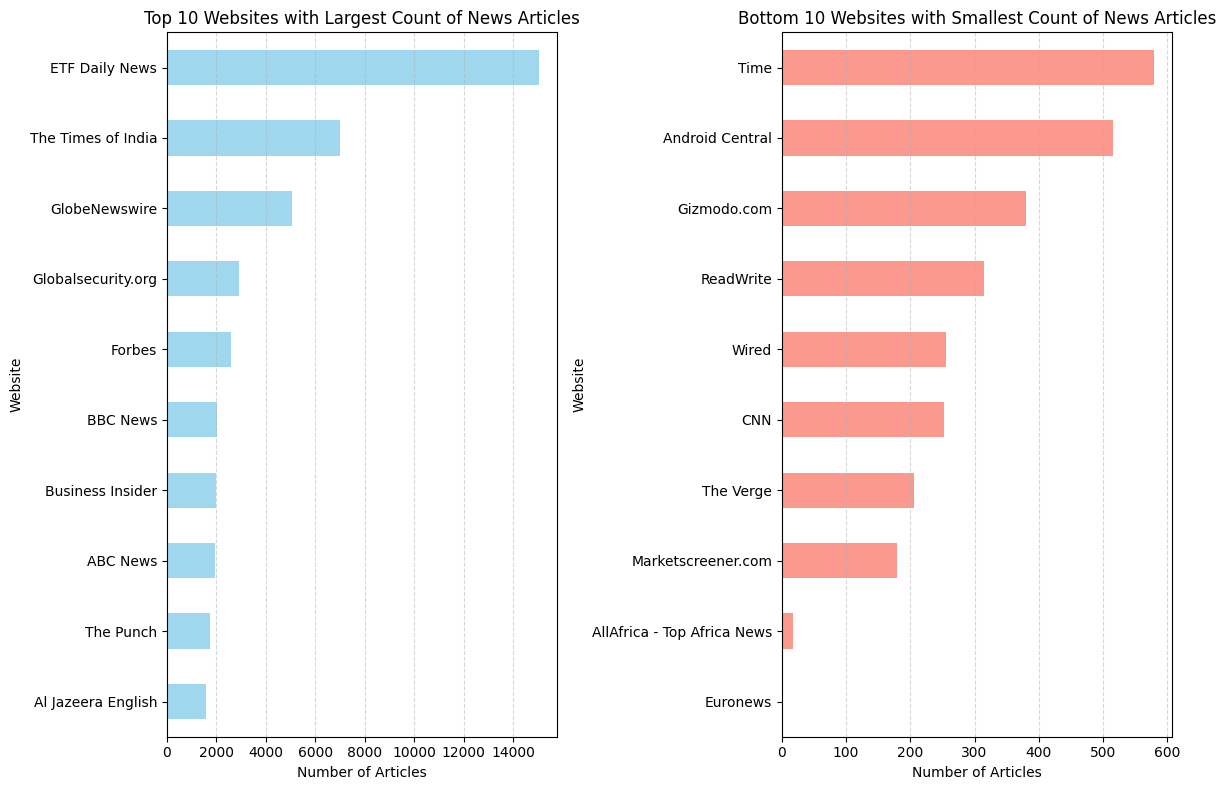

In [6]:

plt.figure(figsize=(12, 8))

# Plot for top 10 websites
plt.subplot(1, 2, 1)
top_10_websites.sort_values().plot(kind='barh', color='skyblue', alpha=0.8)
plt.title('Top 10 Websites with Largest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Plot for bottom 10 websites
plt.subplot(1, 2, 2)
bottom_10_websites.sort_values().plot(kind='barh', color='salmon', alpha=0.8)
plt.title('Bottom 10 Websites with Smallest Count of News Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Website')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [7]:
# Websites with the Highest Numbers of Visitors Traffic

websites_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)
print(merge_df.GlobalRank)
print("\nWebsites with Highest Numbers of Visitors Traffic:\n", websites_traffic)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
52388   NaN
52389   NaN
52390   NaN
52391   NaN
52392   NaN
Name: GlobalRank, Length: 52393, dtype: float64

Websites with Highest Numbers of Visitors Traffic:
 source_name
ABC News                      NaN
Al Jazeera English            NaN
AllAfrica - Top Africa News   NaN
Android Central               NaN
BBC News                      NaN
Boing Boing                   NaN
Business Insider              NaN
CNN                           NaN
Deadline                      NaN
Digital Trends                NaN
Name: GlobalRank, dtype: float64


In [8]:
#  Countries with the Highest Number of News Media Organisations
countries_media_organizations = merge_df['Country'].value_counts()
print("\nCountries with the Highest Number of News Media Organisations:")
print(countries_media_organizations)



Countries with the Highest Number of News Media Organisations:
Series([], Name: count, dtype: int64)


In [9]:
# Countries that have many articles written about them
articles_about_countries = merge_df['Country'].value_counts()
print("\nCountries that have many articles written about them:", articles_about_countries)



Countries that have many articles written about them: Series([], Name: count, dtype: int64)


In [10]:

#  Websites that reported about specific countries or regions
countries_of_interest = ['Africa', 'US', 'China', 'EU', 'Russia', 'Ukraine', 'Middle East']
websites_reporting_about_countries = merge_df[merge_df['Country'].isin(countries_of_interest)]

print("\nWebsites that reported about specific countries or regions:", websites_reporting_about_countries)



Websites that reported about specific countries or regions: Empty DataFrame
Columns: [article_id, source_name, author, title, description, url, published_at, content, category, article, title_sentiment, SourceCommonName, location, Country, GlobalRank, TldRank, Domain, TLD, RefSubNets, RefIPs, IDN_Domain, IDN_TLD, PrevGlobalRank, PrevTldRank, PrevRefSubNets, PrevRefIPs]
Index: []

[0 rows x 26 columns]


In [11]:

#Websites with the highest count of positive, neutral, and negative sentiment
sentiment_counts_by_website = merge_df.groupby('source_name')['title_sentiment'].value_counts()
print("\nWebsites with the highest count of positive, neutral, and negative sentiment:", sentiment_counts_by_website)



Websites with the highest count of positive, neutral, and negative sentiment: source_name         title_sentiment
ABC News            Neutral            1120
                    Negative            693
                    Positive            133
Al Jazeera English  Neutral             892
                    Negative            665
                                       ... 
Time                Negative            180
                    Positive             32
Wired               Neutral             129
                    Positive             64
                    Negative             63
Name: count, Length: 82, dtype: int64


In [12]:
# Compare the impact of using mean/average and median

merge_df['title_sentiment'] = pd.to_numeric(merge_df['title_sentiment'], errors='coerce')

impact_mean_average_median = merge_df[['title_sentiment']].agg(['mean', 'median'])

print("\nImpact of using mean/average and median sentiment:", impact_mean_average_median)



Impact of using mean/average and median sentiment:         title_sentiment
mean                NaN
median              NaN


C:\Users\selam\AppData\Roaming\Python\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:

# Check the distribution of sentiments for a particular domain
top_10_domains_by_traffic = merge_df.groupby('source_name')['GlobalRank'].max().nlargest(10)
sentiment_distribution_for_domain = merge_df[merge_df['source_name'].isin(top_10_domains_by_traffic.index)]['title_sentiment'].value_counts()

print("Sentiment distribution for a particular domain:")
print(sentiment_distribution_for_domain)

Sentiment distribution for a particular domain:
Series([], Name: count, dtype: int64)


In [14]:
if not sentiment_distribution_for_domain.empty:

    plt.figure(figsize=(8, 6))
    sentiment_distribution_for_domain.plot(kind='bar', color='lightgreen')
    plt.title('Distribution of Sentiments for a Particular Domain')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Sentiment distribution data is empty. Unable to plot.")

Sentiment distribution data is empty. Unable to plot.


In [15]:
# Compare content metadata across sites
content_metadata_comparison = merge_df.groupby('source_name')[['author', 'category']].nunique()
print("\nComparison of content metadata across sites:", content_metadata_comparison)



Comparison of content metadata across sites:                               author  category
source_name                                   
ABC News                         682       199
Al Jazeera English               219       164
AllAfrica - Top Africa News       10         7
Android Central                   25        48
BBC News                          69       185
Boing Boing                       20        97
Business Insider                 472       144
CNN                              174       121
Deadline                          52       152
Digital Trends                    64        75
ETF Daily News                     2       148
Euronews                           2         2
Forbes                          1283       161
Gizmodo.com                       35        82
Globalsecurity.org                 1       193
GlobeNewswire                   1913       178
International Business Times     370       186
Marketscreener.com                 9        56
NPR           

<Figure size 1000x600 with 0 Axes>

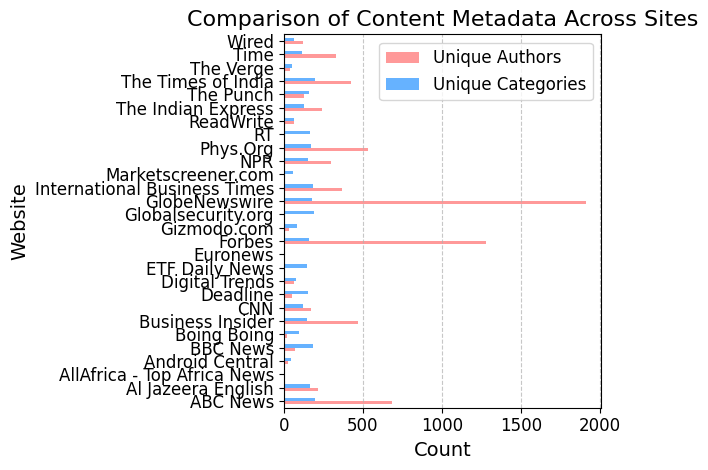

In [16]:
import matplotlib.pyplot as plt

# New color palette
colors = ['#FF9999', '#66B2FF']

plt.figure(figsize=(10, 6))
content_metadata_comparison.plot(kind='barh', color=colors)

plt.title('Comparison of Content Metadata Across Sites', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Website', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.legend(['Unique Authors', 'Unique Categories'], fontsize=12)

plt.tight_layout()
plt.show()


In [17]:
# Analyze the similarity of message lengths across sites
message_lengths = merge_df.groupby('source_name')['content'].apply(lambda x: x.str.len().mean())
print("\nAnalysis of the similarity of message lengths across sites:", message_lengths)


Analysis of the similarity of message lengths across sites: source_name
ABC News                        213.093525
Al Jazeera English              212.956522
AllAfrica - Top Africa News     213.388889
Android Central                 213.961165
BBC News                        212.383548
Boing Boing                     213.500719
Business Insider                213.221154
CNN                             213.571429
Deadline                        213.515118
Digital Trends                  213.613666
ETF Daily News                  213.941536
Euronews                        213.500000
Forbes                          212.974747
Gizmodo.com                     213.821053
Globalsecurity.org              212.546143
GlobeNewswire                   212.951389
International Business Times    213.516522
Marketscreener.com              208.505556
NPR                             204.399361
Phys.Org                        213.759095
RT                              213.503683
ReadWrite               

<Figure size 1200x800 with 0 Axes>

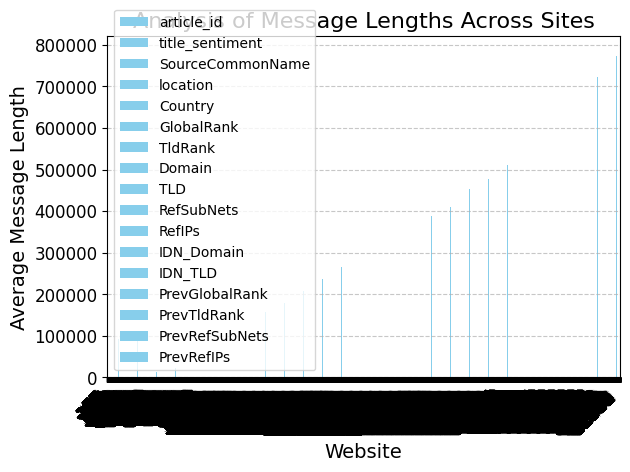

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
merge_df.plot(kind='bar', color='skyblue')

plt.title('Analysis of Message Lengths Across Sites', fontsize=16)
plt.xlabel('Website', fontsize=14)
plt.ylabel('Average Message Length', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [19]:
# Analyze the similarity of the number of words in titles across sites
title_word_counts = merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len().mean())
print("\nAnalysis of the similarity of the number of words in titles across sites:", title_word_counts)



Analysis of the similarity of the number of words in titles across sites: source_name
ABC News                        13.449640
Al Jazeera English              10.153749
AllAfrica - Top Africa News     10.055556
Android Central                 12.229126
BBC News                         9.330030
Boing Boing                     12.162590
Business Insider                17.973684
CNN                             13.265873
Deadline                        15.508399
Digital Trends                  10.880420
ETF Daily News                  10.755504
Euronews                        11.500000
Forbes                          10.316239
Gizmodo.com                     10.473684
Globalsecurity.org              12.132920
GlobeNewswire                   15.444444
International Business Times     9.680870
Marketscreener.com              11.527778
NPR                             11.794462
Phys.Org                        11.291835
RT                               8.548803
ReadWrite                      

In [20]:
plt.figure(figsize=(10, 6))
merge_df.plot(kind='bar', color='skyblue')
plt.title('Analysis of Message Lengths Across Sites')
plt.xlabel('Website')
plt.ylabel('Average Message Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

MemoryError: 

<Figure size 640x480 with 1 Axes>

C:\Users\selam\AppData\Local\Temp\ipykernel_27152\314304121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=title_word_counts.index, y=title_word_counts, palette='Blues')


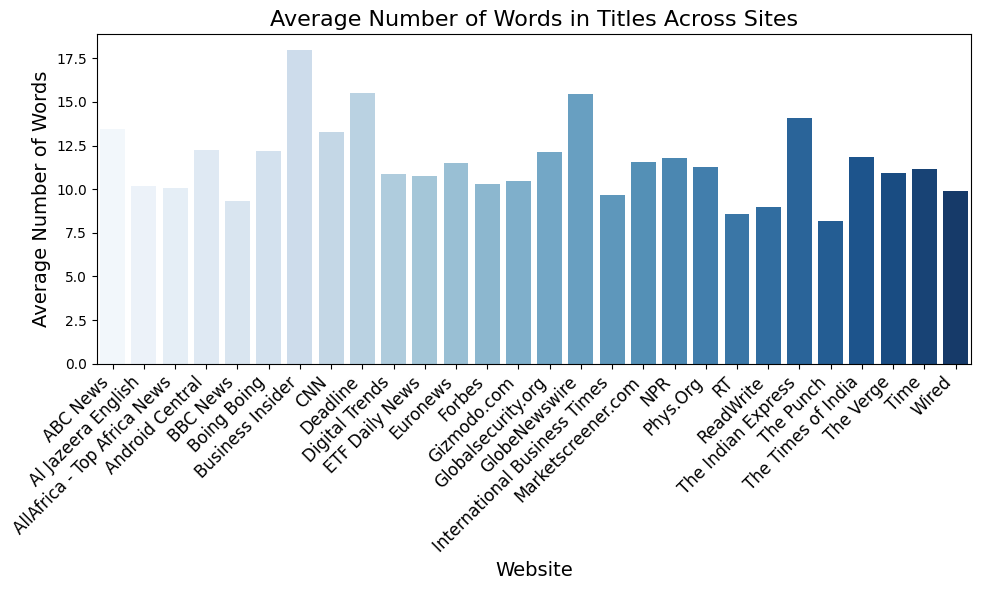

In [21]:
import seaborn as sns

plt.figure(figsize=(10, 6))

# Using seaborn barplot for better aesthetics
sns.barplot(x=title_word_counts.index, y=title_word_counts, palette='Blues')

plt.title('Average Number of Words in Titles Across Sites', fontsize=16)
plt.xlabel('Website', fontsize=14)
plt.ylabel('Average Number of Words', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


In [22]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Set the width of the bars
bar_width = 0.35

#

<Figure size 1000x600 with 0 Axes>

C:\Users\selam\AppData\Local\Temp\ipykernel_27152\1701420149.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merge_df, x='source_name', y=merge_df['content'].str.len(), palette='Set2')


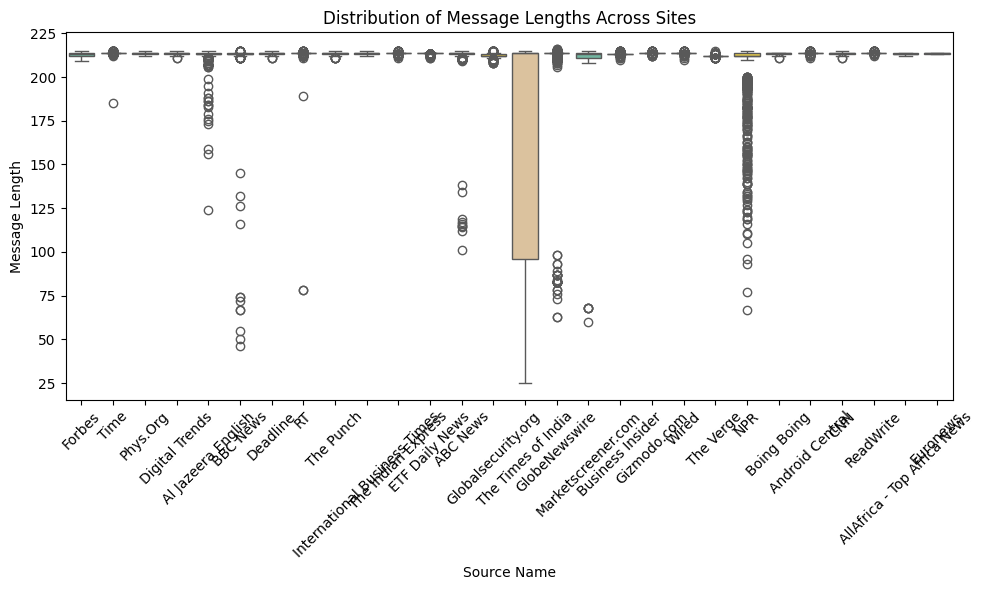

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=merge_df, x='source_name', y=merge_df['content'].str.len(), palette='Set2')
plt.title('Distribution of Message Lengths Across Sites')
plt.xlabel('Source Name')
plt.ylabel('Message Length')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



C:\Users\selam\AppData\Local\Temp\ipykernel_27152\4002584787.py:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=word_counts, fill=True, palette=custom_palette)


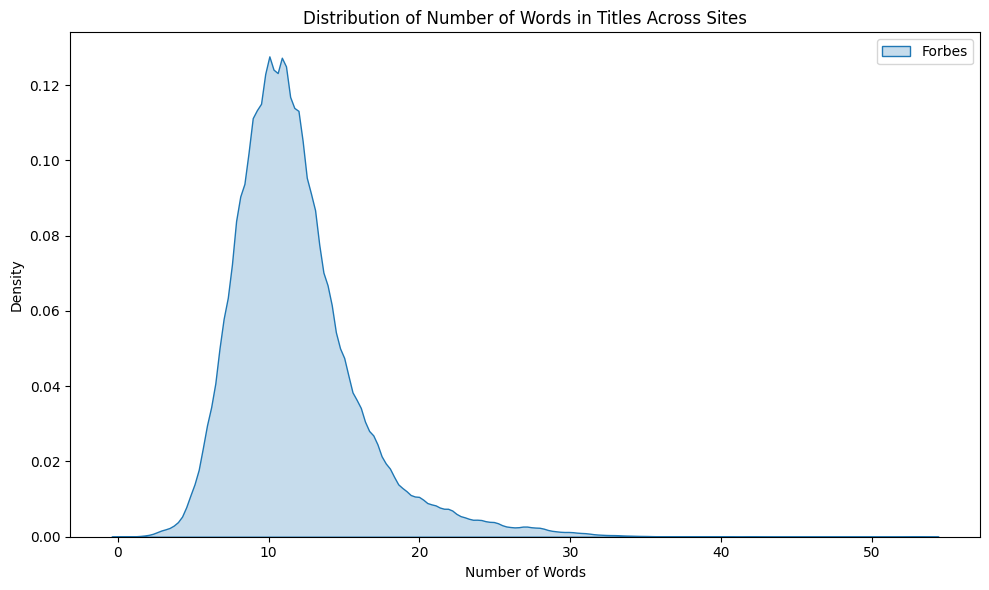

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Similarity of number of words in titles across sites
plt.figure(figsize=(10, 6))

# Group by 'source_name' and calculate the number of words in titles
word_counts = merge_df.groupby('source_name')['title'].apply(lambda x: x.str.split().str.len())

# Plot the kernel density estimate plot using Seaborn with filling
sns.kdeplot(data=word_counts, fill=True)

plt.title('Distribution of Number of Words in Titles Across Sites')
plt.xlabel('Number of Words')
plt.ylabel('Density')

plt.legend(merge_df['source_name'].unique())
plt.tight_layout()
plt.show()
